# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
print(combined_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [7]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()

print( {num_mice})


{249}


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

print(f'The following mice have duplicate entries: {duplicate_mice}')

The following mice have duplicate entries: ['g989']


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] == duplicate_mouse_id]

print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

# Check the number of unique mice in the clean dataframe
num_mice = clean_data['Mouse ID'].nunique()

print(f'The number of unique mice in the clean data is: {num_mice}')

The number of unique mice in the clean data is: 249


In [13]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()

print(f'The number of unique mice in the clean data is: {num_mice_clean}')


The number of unique mice in the clean data is: 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 
                                              'median': 'Median Tumor Volume', 
                                              'var': 'Tumor Volume Variance', 
                                              'std': 'Tumor Volume Std. Dev.', 
                                              'sem': 'Tumor Volume Std. Err.'})
print(summary_stats)



              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.458254            50.854632              44.053659   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])\
                         .rename(columns={'mean': 'Mean Tumor Volume', 
                                          'median': 'Median Tumor Volume', 
                                          'var': 'Tumor Volume Variance', 
                                          'std': 'Tumor Volume Std. Dev.', 
                                          'sem': 'Tumor Volume Std. Err.'})


# Using the aggregation method, produce the same summary statistics in a single line.

print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.458254            50.854632              44.053659   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

## Bar and Pie Charts

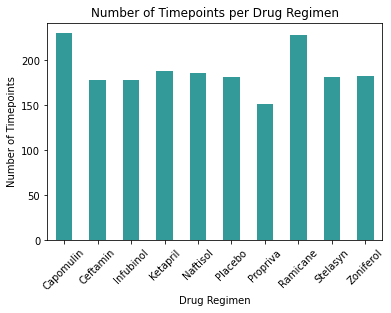

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot of the timepoint counts using Pandas
ax = timepoint_counts.plot(kind='bar', color='teal', alpha=0.8, rot=45)

# Set the title and axis labels
ax.set_title('Number of Timepoints per Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Timepoints')

# Show the plot
plt.show()



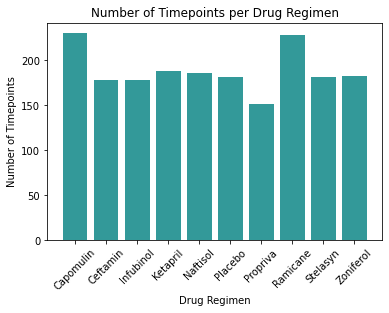

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_counts = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot of the timepoint counts using pyplot
fig, ax = plt.subplots()
ax.bar(timepoint_counts.index, timepoint_counts.values, color='teal', alpha=0.8)

# Set the title and axis labels
ax.set_title('Number of Timepoints per Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Timepoints')

# Rotate the x-axis labels by 45 degrees for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



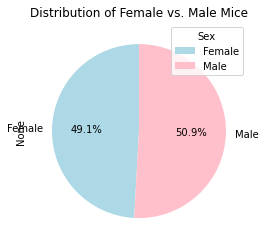

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the clean dataframe by sex and count the number of mice in each group
sex_counts = clean_data.groupby('Sex').size()

# Create a pie chart of the sex counts using Pandas
ax = sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

# Set the title and legend
ax.set_title('Distribution of Female vs. Male Mice')
ax.legend(title='Sex', labels=sex_counts.index, loc='upper right')

# Show the plot
plt.show()



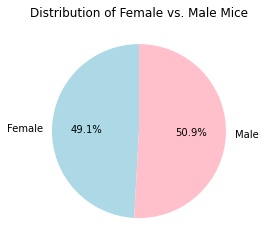

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the clean dataframe by sex and count the number of mice in each group
sex_counts = clean_data.groupby('Sex').size()

# Create a pie chart of the sex counts using pyplot
fig, ax = plt.subplots()
ax.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

# Set the title
ax.set_title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = clean_data[clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
last_timepoint = four_treatments.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, four_treatments, on=['Mouse ID', 'Timepoint'])
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volume.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [21]:
# Create a list of the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each regimen
tumor_volumes = []

# Loop through each treatment regimen and calculate the IQR and potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_volumes.append(final_tumor_vol)
    
    # Calculate the IQR and determine the upper and lower bounds for potential outliers
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine if there are any potential outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}: Potential outliers: {outliers}")


Capomulin: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


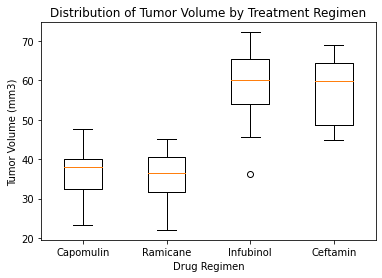

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each regimen
tumor_volumes = []

# Loop through each treatment regimen and extract the tumor volume data
for treatment in treatments:
    final_tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volumes.append(final_tumor_vol)

# Create a box plot of the tumor volume data for each regimen
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes)

# Add x-axis and y-axis labels and a title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume by Treatment Regimen')

# Add tick labels for the x-axis
ax.set_xticklabels(treatments)

# Show the plot
plt.show()



## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Step 1: Filter the data to include only the Capomulin treatment regimen.
capomulin_df = study_results.loc[study_results["Drug Regimen"] == "Capomulin"]

# Step 2: Choose a mouse ID that was treated with Capomulin.
mouse_id = "s185"

# Step 3: Filter the data again to include only the chosen mouse ID.
mouse_capomulin_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

# Step 4: Create a line plot of tumor volume vs. time point.
fig, ax = plt.subplots()
ax.plot(mouse_capomulin_df["Timepoint"], mouse_capomulin_df["Tumor Volume (mm3)"])

# Add x-axis and y-axis labels and a title.
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title(f"Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin")

# Show the plot.
plt.show()


KeyError: 'Drug Regimen'

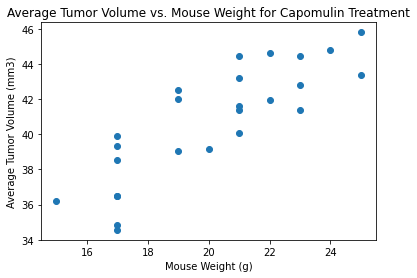

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Read in the data files
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Merge the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Remove any duplicate rows
cleaned_df = merged_df.drop_duplicates()

# Filter the data to include only the Capomulin treatment regimen.
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID to calculate the average tumor volume and mouse weight for each mouse.
capomulin_grouped = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Create a scatter plot of average tumor volume vs. mouse weight.
fig, ax = plt.subplots()
ax.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Add x-axis and y-axis labels and a title.
ax.set_xlabel("Mouse Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_title("Average Tumor Volume vs. Mouse Weight for Capomulin Treatment")

# Show the plot.
plt.show()




## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
capomulin_grouped = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
correlation = st.pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight anslope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.plot(capomulin_grouped['Weight (g)'], slope * capomulin_grouped['Weight (g)'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()


SyntaxError: EOL while scanning string literal (4132363586.py, line 6)